Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Рассадин Вячеслав Александрович

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests as req
from datetime import datetime



def send_req(url):
  response = req.get(url)
  if response.status_code == 200:
    return response.json()


def clr_data(data):

  dt = datetime.today().date()
  dt = f'{dt.day}.{dt.month}'
  temp = data['current']['temperature_2m']
  temp_format = data['current_units']['temperature_2m']

  wthr_code = data['current']['weather_code']

  if wthr_code == 0:
    weather = 'Ясно'
  elif wthr_code == 1:
    weather = 'Преимущественно ясно'
  elif wthr_code == 2:
    weather = 'Облачно'
  elif wthr_code == 3:
    weather = 'Пасмурно'
  elif wthr_code == 45 or wthr_code == 48:
    weather = 'Туман'
  elif wthr_code in [61, 63, 67]:
    weather = 'Дождик'
  elif wthr_code in [71, 73, 75, 77]:
    weather = 'Снежок'
  else:
    weather = 'На улице либо дождь, либо дождя нет'

  return f'({dt}) - Сейчас {temp}{temp_format}. {weather}.'


def main(params):

  url = f'https://api.open-meteo.com/v1/forecast?latitude={params[0]}&longitude={params[1]}&current=temperature_2m,precipitation,weather_code&timezone=Europe%2FMoscow&forecast_days=1'

  data = send_req(url)
  message = clr_data(data)

  print(message)


params = [56.50, 60.35]
main(params)

(30.10) - Сейчас 1.9°C. Облачно.


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests as req


def send_req(url):

  response = req.get(url)

  if response.status_code == 200:
    return response.json()

  else:
    print('Проблема на стороне сайта или неверно введено имя покемона (скорее второе)')


def clr_data(data):

  name = data['name']
  weight = data['weight']
  height = data['height']
  tipe = data['types'][0]['type']['name']
  message1 = f'({name}) - Тип: {tipe}. Вес: {weight}. Рост: {height}.'

  abilities = []

  for i in data['abilities']:
    abilities.append(i['ability']['name'])
  message2 = 'Способности: '

  for i in range(len(abilities)):
    message2 += f'{abilities[i]}'
    if i != (len(abilities) - 1):
      message2 += ', '

  return [message1, message2]


def main(par):

  url = f'https://pokeapi.co/api/v2/pokemon/{par}'
  data = send_req(url)
  message = clr_data(data)

  print(message[0])
  print(message[1])


vvod = input('Имя покемона: ')
main(vvod)

Имя покемона: clefairy
(clefairy) - Тип: fairy. Вес: 75. Рост: 6.
Способности: cute-charm, magic-guard, friend-guard


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests as req


def send_req(url): #1

  response = req.get(url)

if response.status_code == 200:
    return response.json()


def search_id(post_id, url): #2

  data = send_req(url)

  for i in data:

    if i['id'] == post_id:
      return i


def clr_search(data): #3

  user_id = data['userId']
  post_id = data['id']
  title = data['title']
  body = data['body']

  print('ID Пользователя:', user_id)
  print('ID Сообщения:', post_id)
  print()
  print('Заголовок:', title)
  print()
  print('Текст:', body)

url = 'https://jsonplaceholder.typicode.com/posts'

clr_search(search_id(5, url))

ID Пользователя: 1
ID Сообщения: 5

Заголовок: nesciunt quas odio

Текст: repudiandae veniam quaerat sunt sed
alias aut fugiat sit autem sed est
voluptatem omnis possimus esse voluptatibus quis
est aut tenetur dolor neque


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests as req

urll = 'https://jsonplaceholder.typicode.com/posts'

def send_req(url):

  response = req.get(url)

  if response.status_code == 200:
    return response.json()


def create_post(url): #1

  id_user = input('ID Пользователя: ')
  title = input('Заголовок: ')
  body = input('Текст: ')

  obj = {
      'userId': id_user,
      'title': title,
      'body': body
  }

  print('Пост создан')
  response = req.post(url, data = obj)

  return response.json()


def update_post(url): #2

  id_post = input('Введите номер поста: ')
  title = input('Заголовок: ')
  body = input('Текст: ')

  obj = {
      'id': id_post,
      'title': title,
      'body': body
  }

  print('Пост обновлен')
  response = req.put(url, data = obj)

  return response.json()

def delete_post(url): #3

  id_post = input('Введите номер поста: ')
  obj ={
      'id': id_post
  }
  response = req.delete(url, data = obj)
  return response

print(delete_post(urll))


Введите номер поста: 2
<Response [404]>


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Породы собак: 
1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian
7. bakharwal
8. basenji
9. beagle
10. bluetick
11. borzoi
12. bouvier
13. boxer
14. brabancon
15. briard
16. buhund
17. bulldog
18. bullterrier
19. cattledog
20. cavapoo
21. chihuahua
22. chippiparai
23. chow
24. clumber
25. cockapoo
26. collie
27. coonhound
28. corgi
29. cotondetulear
30. dachshund
31. dalmatian
32. dane
33. danish
34. deerhound
35. dhole
36. dingo
37. doberman
38. elkhound
39. entlebucher
40. eskimo
41. finnish
42. frise
43. gaddi
44. germanshepherd
45. greyhound
46. groenendael
47. havanese
48. hound
49. husky
50. keeshond
51. kelpie
52. kombai
53. komondor
54. kuvasz
55. labradoodle
56. labrador
57. leonberg
58. lhasa
59. malamute
60. malinois
61. maltese
62. mastiff
63. mexicanhairless
64. mix
65. mountain
66. mudhol
67. newfoundland
68. otterhound
69. ovcharka
70. papillon
71. pariah
72. pekinese
73. pembroke
74. pinscher
75. pitbull
76. pointer
77. pomeranian
78. poodle


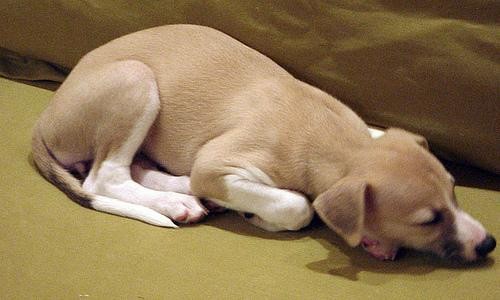

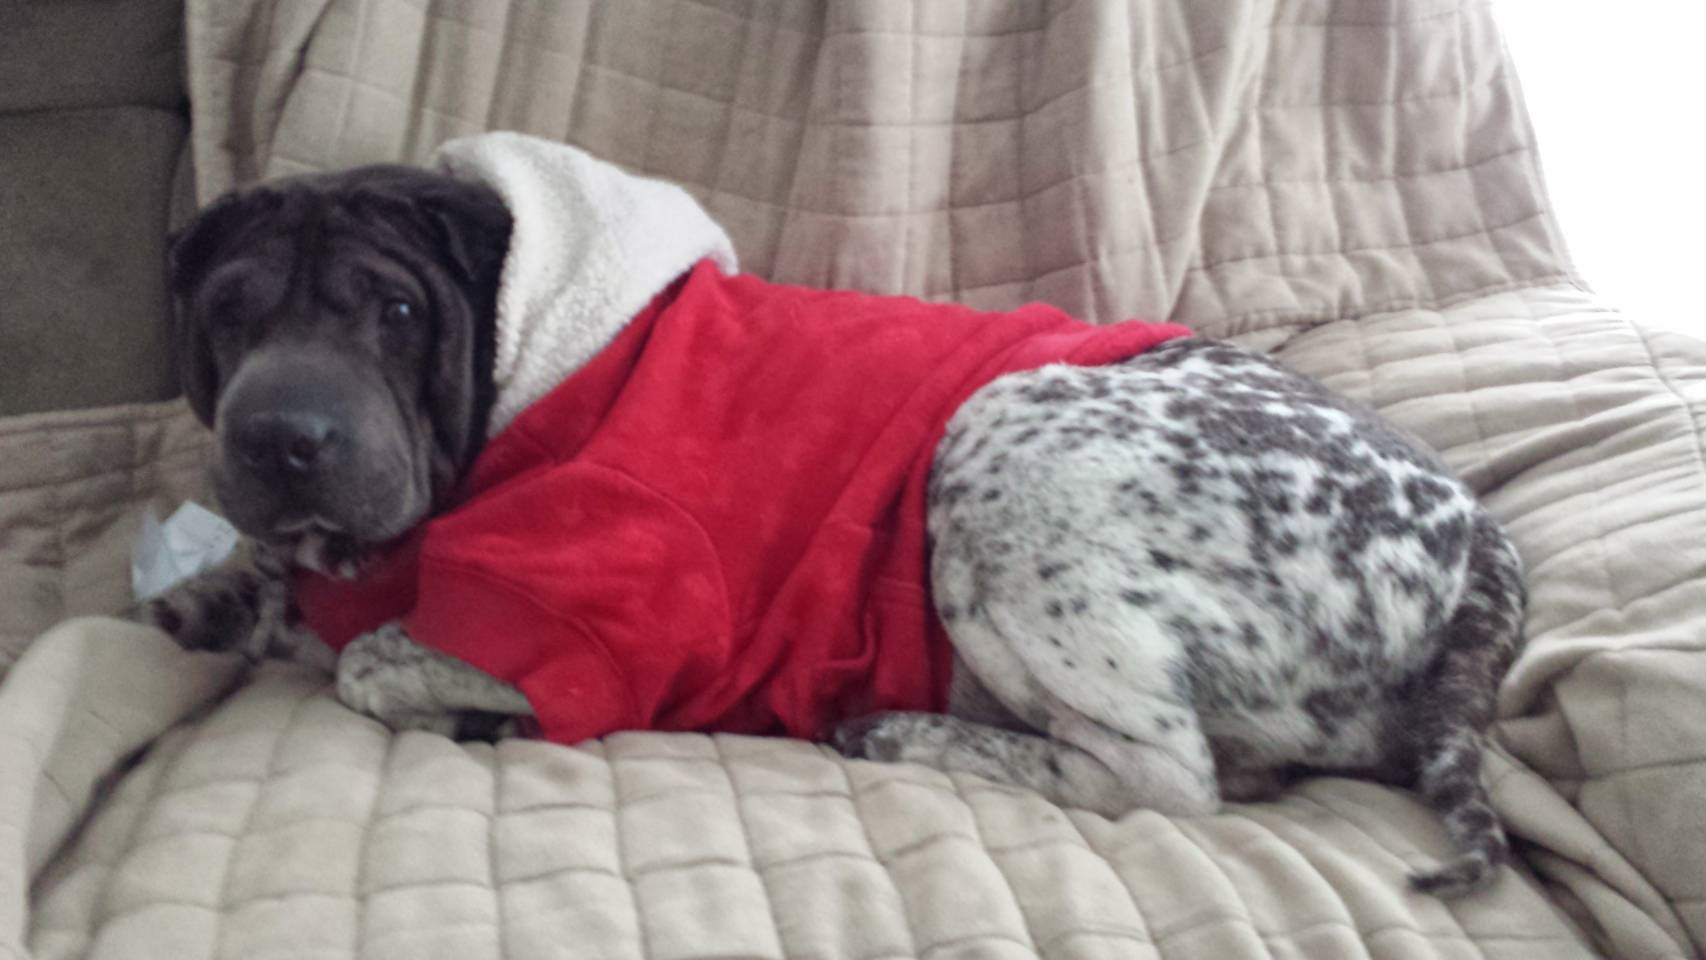

In [ ]:
import requests
from PIL import Image
import io
from IPython.display import display

url = "https://dog.ceo/api/breeds/list/all"

def entry_parods( ):

  breeds = input("Введите породы собак через запятую: ").split(", ")

  return breeds


def parod_list(url):

  response = requests.get(url)

  if response.status_code == 200:
    res = response.json( )
    num = 0

    print("Породы собак: ")

    for breeds in res["message"].keys( ):
      num += 1

      print(f'{num}. {breeds}')


def image( ):

  epl = entry_parods( )

  for num_image in epl:
    image_breed = f'https://dog.ceo/api/breed/{num_image}/images/random'
    res = requests.get(image_breed)
    img_url_json = res.json( )
    img_response = requests.get(img_url_json['message'])
    img = Image.open(io.BytesIO(img_response.content))

    display(img)


parod_list(url)
image( )